In [1]:
import sqlite3
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db = sqlite3.connect('./weather.db')

### Load list of fields and station codes

In [3]:
data_format = []
with requests.get(r'https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/terminowe/synop/s_t_format.txt') as format_file:
    format_file.encoding = 'cp1250'
    data_format = [line.strip().split('  ')[0] for line in format_file.text.splitlines()[1:-8]]
    
station_codes = pd.read_sql("SELECT distinct `Kod stacji` FROM weather", db).iloc[:,0]

### get list of station names ('nazwa stacji') and dates of thier first ('pierwszego') and most recent report ('najnowszego')

In [4]:
with pd.option_context("display.max_rows", None):
    
    sql_query = """
    SELECT `Kod stacji`, `Nazwa stacji`,
    (`Rok` || '-' || `Miesiąc` || '-' || `Dzień` || ' ' || `Godzina` || ':00:00') as Data
    FROM weather"""
    
    sql_out = pd.read_sql_query(sql_query, db, parse_dates='Data')
    display(sql_out.groupby(['Kod stacji','Nazwa stacji']).agg(
        {"Data": [("pierwszego pomiaru", min), ("najnowszego pomiaru", max)]}))

Data                    
                                 pierwszego pomiaru najnowszego pomiaru
Kod stacji Nazwa stacji                                                
349190600  BIELSKO-BIAŁA        1966-01-01 00:00:00 2021-06-30 23:00:00
349190625  ZAKOPANE             1961-01-01 00:00:00 2021-06-30 23:00:00
349190650  KASPROWY WIERCH      1966-01-01 00:00:00 2021-06-30 23:00:00
349200628  HALA GĄSIENICOWA     2019-01-01 00:00:00 2021-06-30 23:00:00
349200660  NOWY SĄCZ            1966-01-01 00:00:00 2021-06-30 23:00:00
349210670  KROSNO               1985-01-01 00:00:00 2021-06-30 23:00:00
349220690  LESKO                1966-01-01 00:00:00 2021-06-30 23:00:00
349220695  PRZEMYŚL             1961-01-01 00:00:00 2000-06-30 18:00:00
350150500  JELENIA GÓRA         1966-01-01 00:00:00 2021-06-30 23:00:00
350150510  ŚNIEŻKA              1966-01-01 00:00:00 2021-06-30 23:00:00
350160520  KŁODZKO              1966-01-01 00:00:00 2021-06-30 23:00:00
350170530  OPOLE                1966-01-01 00:00:00 2021-06-30 23:00:00
350180540  RACIBÓRZ             1966-01-01 00:00:00 2021-06-30 23:00:00
350190550  CZĘSTOCHOWA          1966-01-01 00:00:00 2021-06-30 23:00:00
350190560  KATOWICE             1966-01-01 00:00:00 2018-12-31 23:00:00
           KATOWICE-MUCHOWIEC   2019-01-01 00:00:00 2021-06-30 23:00:00
350190566  KRAKÓW-BALICE        1961-01-01 00:00:00 2021-06-30 23:00:00
350200570  KIELCE-SUKÓW         1966-01-01 00:00:00 2021-06-30 23:00:00
350200575  TARNÓW               1966-01-01 00:00:00 2021-06-30 23:00:00
350210585  SANDOMIERZ           1966-01-01 00:00:00 2021-06-30 23:00:00
350220580  RZESZÓW-JASIONKA     1966-01-01 00:00:00 2021-06-30 23:00:00
350230595  ZAMOŚĆ               1965-11-01 00:00:00 2021-06-30 23:00:00
351150400  ZIELONA GÓRA         1966-01-01 00:00:00 2021-06-30 23:00:00
351150405  ZGORZELEC            2008-01-01 00:00:00 2010-10-31 18:00:00
351160415  LEGNICA              1966-01-01 00:00:00 2021-06-30 23:00:00
351160418  LESZNO               1966-01-01 00:00:00 2021-06-30 23:00:00
351160424  WROCŁAW              1966-01-01 00:00:00 2018-12-31 23:00:00
           WROCŁAW-STRACHOWICE  1961-01-01 00:00:00 2021-06-30 23:00:00
351180435  KALISZ               1966-01-01 00:00:00 2021-06-30 23:00:00
351180455  WIELUŃ               1965-11-01 00:00:00 2021-06-30 23:00:00
351190465  ŁÓDŹ                 1965-11-01 00:00:00 2018-12-31 23:00:00
           ŁÓDŹ-LUBLINEK        2012-01-01 00:00:00 2021-06-30 23:00:00
351190469  SULEJÓW              1966-01-01 00:00:00 2021-06-30 23:00:00
351210488  KOZIENICE            1977-01-01 00:00:00 2021-06-30 23:00:00
351220495  LUBLIN-RADAWIEC      1961-01-01 00:00:00 2021-06-30 23:00:00
351230497  WŁODAWA              1966-01-01 00:00:00 2021-06-30 23:00:00
352140310  SŁUBICE              1966-01-01 00:00:00 2021-06-30 23:00:00
352150300  GORZÓW WIELKOPOLSKI  1966-01-01 00:00:00 2021-06-30 23:00:00
352160330  POZNAŃ               1961-01-01 00:00:00 2018-12-31 23:00:00
           POZNAŃ-ŁAWICA        1966-01-01 00:00:00 2021-06-30 23:00:00
352180345  KOŁO                 1966-01-01 00:00:00 2020-12-31 23:00:00
352190360  PŁOCK                1966-01-01 00:00:00 2021-06-30 23:00:00
352200375  WARSZAWA             1986-01-01 00:00:00 2018-12-31 23:00:00
           WARSZAWA-OKĘCIE      1961-01-01 00:00:00 2021-06-30 23:00:00
352220385  SIEDLCE              1965-11-01 00:00:00 2021-06-30 23:00:00
352230399  TERESPOL             1966-01-01 00:00:00 2021-06-30 23:00:00
353140200  ŚWINOUJŚCIE          1960-01-01 00:00:00 2021-06-30 23:00:00
353140205  SZCZECIN             1960-01-01 00:00:00 2021-06-30 23:00:00
353150210  RESKO-SMÓLSKO        1966-01-01 00:00:00 2021-06-30 23:00:00
353160215  SZCZECINEK           1966-01-01 00:00:00 2000-04-30 18:00:00
353160230  PIŁA                 1970-10-12 06:00:00 2021-06-30 23:00:00
353170235  CHOJNICE             1966-01-01 00:00:00 2021-06-30 23:00:00
353170240  BYDGOSZCZ            1966-01-01 00:00:00 1982-07-31 18:00:00
353180250  TORU

In [5]:
# some of the stations has changed thier names (like station id 350190560: Katowice -> Katowice-Muchowiec)
# we will need to take care about it later

# some of the stations in dataset are disable and not provide new reports
# such cases shall be removed from analysis

### sample data - Air temperature, pressure and wind speed for Kraków from May 2000

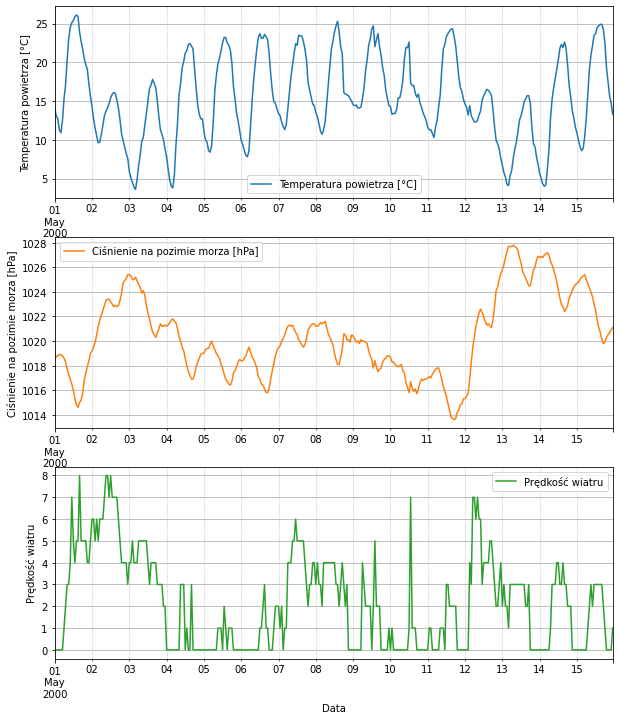

In [6]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

sql_query = """
SELECT (`Rok` || '-' || `Miesiąc` || '-' || `Dzień` || ' ' || `Godzina` || ':00:00') as Data, 
       `Temperatura powietrza [°C]`, `Ciśnienie na pozimie morza [hPa]`, `Prędkość wiatru`
FROM weather WHERE `Kod stacji` = 350190566 AND `Rok` = 2000 AND `Miesiąc` = 5 AND `Dzień` <= 15"""
sql_out = pd.read_sql_query(sql_query, db, parse_dates=['Data']).set_index('Data')

fig, axs = plt.subplots(3, 1, figsize=(10,12))

for i, n in enumerate(sql_out.columns):
    sql_out[n].plot(ax=axs[i], c=colors[i], label=n, legend=True)
    
    axs[i].set_ylabel(n)
    axs[i].grid(True)
    axs[i].grid(True, which='minor', linestyle=':')

### quality check

In [7]:
# In regards to data description from website, in the dataset there are measurement statuses for almost all fields
# Status 8 means no measurement at given datetime, status 9 - absence of phenomenon

In [8]:
statuses = pd.DataFrame(columns=[np.nan, 8.0, 9.0])

prev_col = ''

for c in data_format:
    if c.startswith("Status pomiaru"):
        status = pd.read_sql_query("SELECT `"+c+"`, count(*) FROM weather GROUP BY `"+c+"`", db, index_col=c)
        row_name = c + " (" + prev_col + ")"
        status.name = row_name
        
        statuses.loc[row_name] = status.T.iloc[0]
    prev_col = c
        
statuses.fillna(0, inplace=True)
statuses['% missing'] = statuses[8.0] / statuses.sum(axis=1)
statuses[['% missing']].style.format('{:.2%}')

,% missing
Status pomiaru HPOD (Wysokość podstawy chmur CL CM szyfrowana [kod]),4.01%
Status pomiaru HPON (Wysokość podstawy niższej),84.21%
Status pomiaru HPOW (Wysokość podstawy wyższej [m]),98.90%
Status pomiaru WID (Widzialność),1.19%
Status pomiaru WIDO (Widzialność operatora [m]),73.25%
Status pomiaru WIDA (Widzialność automat [m]),72.44%
Status pomiaru NOG (Zachmurzenie ogólne [oktanty]),4.56%
Status pomiaru KRWR (Kierunek wiatru),0.18%
Status pomiaru FWR (Prędkość wiatru),0.18%
Status pomiaru PORW (Poryw wiatru),0.34%


In [9]:
# We can notice, that most of measures have enormous gaps. However, these are sophisticated measurements 
# and basic ones (like temperature, pressure, wind) have gaps below 0.5% level. 

# One thing needs to be commented - precipitation. Both, amount are type, are reported in 6 hours intervals.
# Thus, we expect gaps in precipitation around ~80% (in also depends on reporting frequency). 

pd.read_sql_query("""SELECT 
`Godzina` as `Hour`, 
`Opad za 6 godzin [mm]` as `Precipitation amount`, 
`Status pomiaru WO6G` as `Status`, 
`Rodzaj opadu za 6 godzin [kod]` as `Precipitation type`,
`Status pomiaru ROPT` as `Status`
FROM weather WHERE `Kod stacji` = 350190566 AND `Rok` = 2020 AND `Miesiąc` = 2 AND `Dzień` = 26""", db)\
.replace({'Status': {8: 'no measurement', 9: 'absence of phenomenon', np.nan: 'measurement correct'}})

,Hour,Precipitation amount,Status,Precipitation type,Status
0,0,0.4,measurement correct,6,measurement correct
1,1,0.0,no measurement,0,no measurement
2,2,0.0,no measurement,0,no measurement
3,3,0.0,no measurement,0,no measurement
4,4,0.0,no measurement,0,no measurement
5,5,0.0,no measurement,0,no measurement
6,6,0.6,measurement correct,6,measurement correct
7,7,0.0,no measurement,0,no measurement
8,8,0.0,no measurement,0,no measurement
9,9,0.0,no measurement,0,no measurement


### Reporting frequency per station

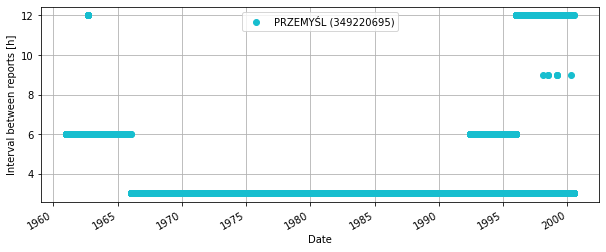

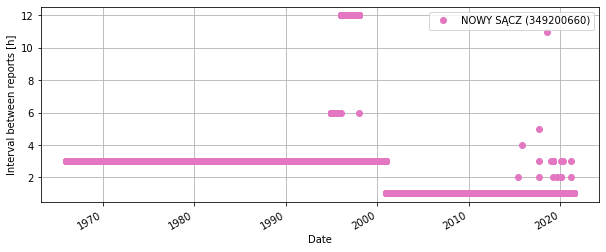

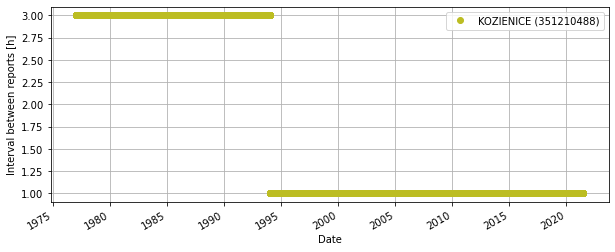

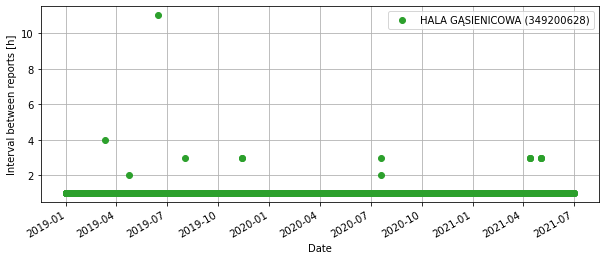

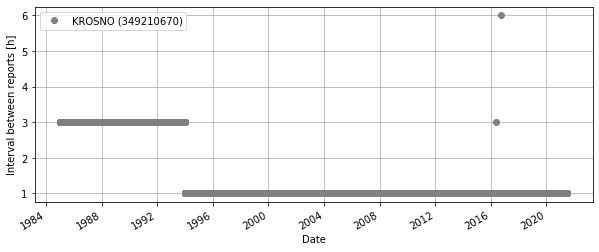

In [10]:
# let's focus on 5 examples
# in normal use we would need to review all stations

for s_code in station_codes.sample(5):
    
    # get datetimes of reports
    dates = pd.read_sql("SELECT (`Rok` || '-' || `Miesiąc` || '-' || `Dzień` || ' ' || `Godzina` || ':00:00') as Date, `Nazwa stacji` as Name FROM weather WHERE `Kod stacji`="+str(s_code), db, parse_dates='Date')
    name = dates['Name'].iloc[-1]
    
    # set index as dates also
    dates.index = dates['Date']
    
    # calculate difference between next 2 reports (in hours)
    dates = dates['Date'].diff(1).astype('timedelta64[h]')
    
    # now we created series with index as report datetimes
    # and values as the elapsed time from the previous measurement
    
    # for long interval (> 36 hours) between reports we will apply logscale on y-axis
    logy = True if dates.max() > 36 else False
    
    dates.plot(marker='o', linestyle='', c=colors[s_code//10%len(colors)],
               label="{} ({})".format(name,s_code),
               figsize=(10,4), grid=True, legend=True, logy=logy, 
               ylabel='Interval between reports [h]')
    plt.show()

In [11]:
# We can observe for some of the stations huge gaps in reports.
# Most of the station increased repotring frequency from 3 to 1 hour around year 2000.